### 목표
- 손글씨 숫자(0~9) 데이터를 분류하는 모델을 만들기
- 분류모델의 불확실성을 확인하기
- 이미지 데이터 형태를 이해하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
digit_data = pd.read_csv('data/digit_train.csv')
digit_data.shape

# 이미지 42000장 이미지 1장 = 1행
# 784개 : 문제
# 1개 : 답 label

(42000, 785)

In [3]:
digit_data.iloc[0]

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

### EDA

In [4]:
img0 = digit_data.iloc[0, 1:]
img0

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [5]:
# 데이터 최댓값, 최솟값 확인하기
print(img0.min(), img0.max())

# 흑백 이미지 그래서 1차원 데이터임
# 0, 1, 2, ... 253, 254, 255
# 검은색 , ............, 흰색

0 255


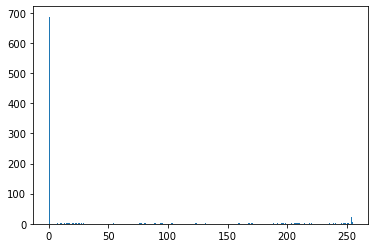

In [6]:
# 데이터 분호 확인하기
# img0 기준으로 확인하기
# 히스토그램
plt.hist(img0, bins=255)
plt.show()

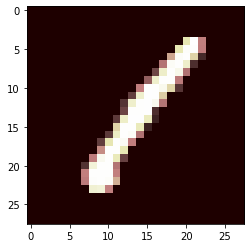

In [7]:
# 이미지 시각화
# 1 배열의 크기 1차원에서 2차원으로 변환
# 2 시각화
tf_img0 = img0.values.reshape(28, 28)
plt.imshow(tf_img0, cmap='pink')

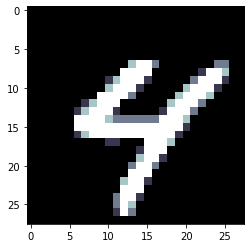

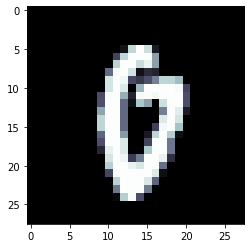

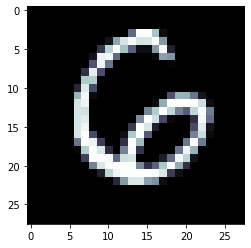

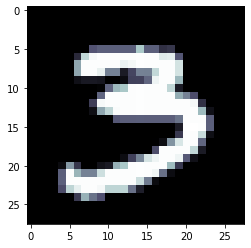

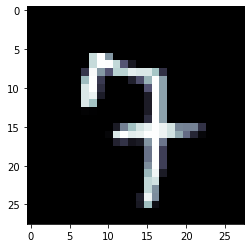

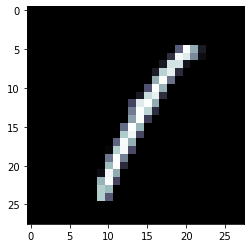

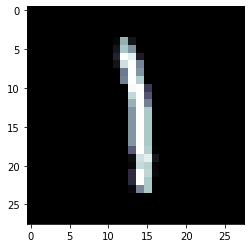

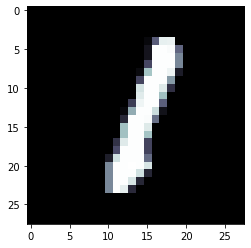

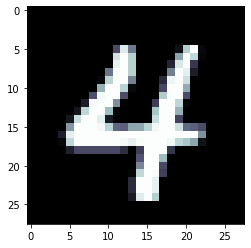

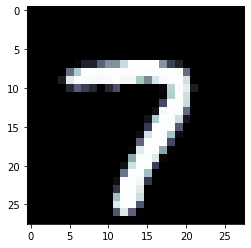

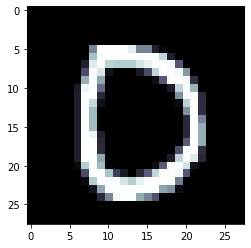

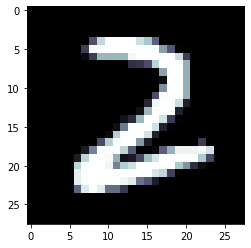

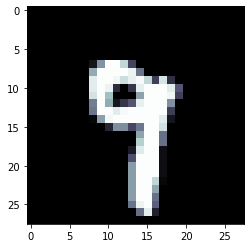

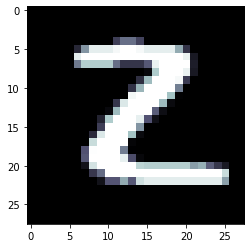

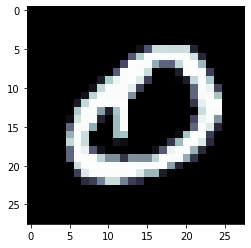

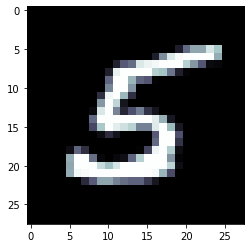

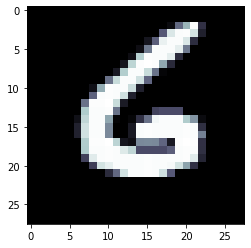

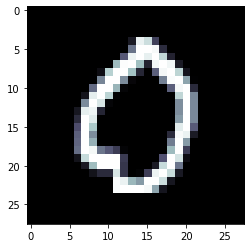

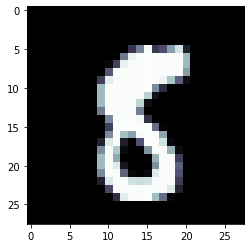

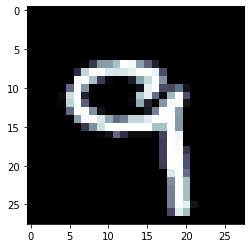

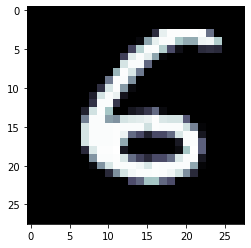

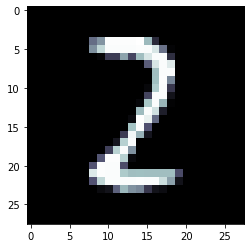

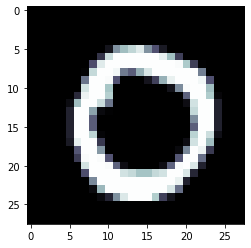

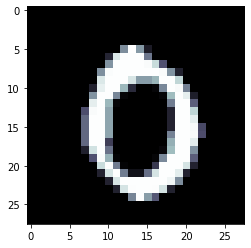

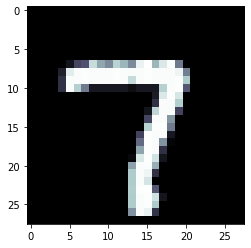

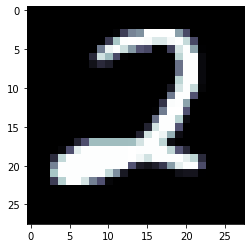

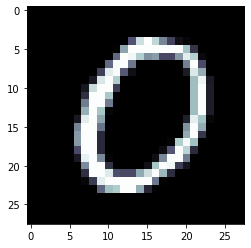

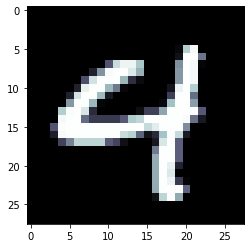

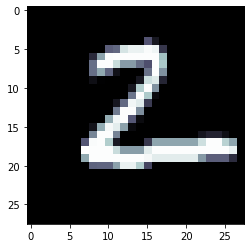

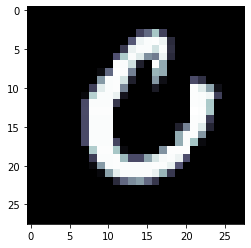

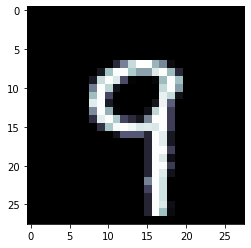

In [8]:
# 250 ~ 280 행 이미지 출력
for i in range(250, 281):
    imgk = digit_data.iloc[i, 1:]
    imgd = imgk.values.reshape(28, 28)
    plt.imshow(imgd, cmap='bone')
    plt.show()

#### 5000장 추출

In [9]:
X = digit_data.iloc[:, 1:]  # 문제 0 ~ 4999
y = digit_data.iloc[:, 0]   # 답 0 ~ 4999  이렇게 하자고 했는데 나는 그냥 전체 데이터 썼다

# 크기확인
print('X.shape', X.shape)
print('y.shape', y.shape)

X.shape (42000, 784)
y.shape (42000,)


In [10]:
# print(y.value_counts())
# 적당히 고르게 있는 듯 하다
# unique()
# np.unique()
print(np.unique(y.values, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188],
      dtype=int64))


train test 분리

In [11]:
# 7:3
# 랜덤고정값 7
# 변수 4개로 받기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (29400, 784)
y_train (29400,)
X_test (12600, 784)
y_test (12600,)


#### 모델링
- knn
- tree
- logistic
- svm
- 교차검증 도구 cross_val_score

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # 회귀라고 썼는데 선형 분류 모델이다
from sklearn.svm import LinearSVC # 선형 분류 모델
from sklearn.model_selection import cross_val_score

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# 모델 만들기
# 기본값 쓰장
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
logi = LogisticRegression()
svm = LinearSVC()

In [22]:
# 4개 모델 일반화 성능 확인하기
knn_result = cross_val_score(knn, X_train, y_train, cv=5)

In [23]:
knn_result.mean()

0.9620408163265306

In [24]:
tree_result = cross_val_score(tree, X_train, y_train, cv=5)

In [25]:
tree_result.mean()

0.8418027210884352

In [26]:
logi_result = cross_val_score(logi, X_train, y_train, cv=5)

In [27]:
logi_result.mean()

0.908639455782313

In [28]:
svm_result = cross_val_score(svm, X_train, y_train, cv=5)

In [29]:
svm_result.mean()

0.8574829931972789

#### 스케일링
- svm 모델에 적용할 데이터 범위 정규화

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
# 스케일링 도구 생성
min_max_sc = MinMaxScaler()

# 내 데이터의 범위 확인
# 데이터를 0~1 사이의 값으로 변환
# fit -> transform
# fit_transform
min_max_sc.fit(X_train)
tf_X_train = min_max_sc.transform(X_train)

# X_test도 바꾸기
tf_X_test = min_max_sc.transform(X_test)

In [47]:
print(tf_X_train.shape)
print(tf_X_test.shape)

(29400, 784)
(12600, 784)


In [48]:
print(tf_X_train.max())
print(tf_X_train.min())
print()
print(tf_X_test.max())
print(tf_X_test.min())

1.0
0.0

216.0
0.0


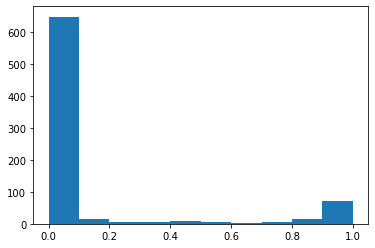

In [67]:
# 범위 시각화
# 히스토그램
plt.hist(tf_X_train[0])
plt.show()

(array([649.,  14.,   7.,   5.,   9.,   6.,   2.,   6.,  15.,  71.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

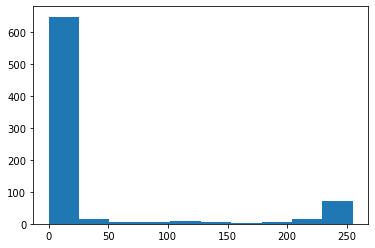

In [59]:
plt.hist(X_train.iloc[0,:])

In [60]:
# 교차 검증
svm_result2 = cross_val_score(svm, tf_X_train, y_train, cv=5)

In [61]:
svm_result2.mean()

0.9059183673469388

#### test 데이터 확인

In [62]:
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)
logi.fit(X_train, y_train)
svm.fit(X_train, y_train)

LinearSVC()

In [64]:
# 평가
print('knn', knn.score(X_test, y_test))
print('tree', tree.score(X_test, y_test))
print('logi', logi.score(X_test, y_test))
print('svm', svm.score(X_test, y_test))

knn 0.9645238095238096
tree 0.8576984126984127
logi 0.9138095238095238
svm 0.8565873015873016


#### 불확실성

In [65]:
X_test[:10]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
12504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# 각 클래스에 대한 예측 확률
knn.predict_proba(X_test[:10])

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0.8, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ]])

In [72]:
tree.predict_proba(X_test[:10])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

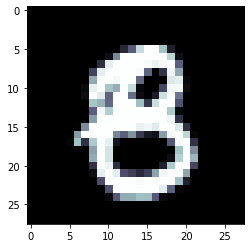

In [79]:
imgk = X_test.values[4].reshape(28, 28)
plt.imshow(imgk, cmap='bone')
plt.show()